In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, RepeatVector, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
prom_file_path = "/home/wenjun/integrated_r11n5.parquet"

In [15]:
data = pd.read_parquet(prom_file_path)

In [16]:
data.head()

,id,timestamp,node,node_time_seconds,node_load15,surfsara_power_usage,up,node_netstat_Tcp_OutSegs,node_netstat_Tcp_InErrs,node_context_switches_total,node_load5,node_load1,node_memory_Active_bytes,node_netstat_Tcp_RetransSegs,node_netstat_Udp_InErrors,node_memory_Dirty_bytes,surfsara_ambient_temp,node_netstat_Icmp_InMsgs,node_netstat_Udp_InDatagrams,node_intr_total,node_netstat_Tcp_InSegs,node_memory_Percpu_bytes,node_boot_time_seconds,node_netstat_Udp_OutDatagrams,node_netstat_Icmp_InErrors,node_procs_blocked,node_netstat_Icmp_OutMsgs,node_memory_MemFree_bytes,node_procs_running,node_forks_total,node_hwmon_temp_celsius-min,node_hwmon_temp_celsius-mean,node_hwmon_temp_celsius-max,node_filesystem_avail_bytes-sum,node_filesystem_files-sum,node_network_transmit_bytes_total-sum,node_filesystem_device_error-sum,node_disk_written_bytes_total-sum,node_filesystem_free_bytes-sum,node_thermal_zone_temp-min,node_thermal_zone_temp-mean,node_thermal_zone_temp-max,node_disk_read_bytes_total-sum,nvidia_gpu_memory_used_bytes-sum,nvidia_gpu_temperature_celsius-min,nvidia_gpu_temperature_celsius-mean,nvidia_gpu_temperature_celsius-max,node_arp_entries-sum,nvidia_gpu_fanspeed_percent-min,nvidia_gpu_fanspeed_percent-mean,nvidia_gpu_fanspeed_percent-max,node_filesystem_files_free-sum,nvidia_gpu_power_usage_milliwatts-min,nvidia_gpu_power_usage_milliwatts-sum,nvidia_gpu_power_usage_milliwatts-mean,nvidia_gpu_power_usage_milliwatts-max,node_filesystem_size_bytes-sum,node_disk_writes_completed_total-sum,nvidia_gpu_duty_cycle-min,nvidia_gpu_duty_cycle-mean,nvidia_gpu_duty_cycle-max,node_network_transmit_packets_total-sum,node_udp_queues-sum,node_network_receive_bytes_total-sum,node_network_receive_packets_total-sum,node_network_receive_multicast_total-sum,node_disk_io_now-sum,node_rapl_package_joules_total-sum,node_network_receive_drop_total-sum,jobID,TIMEOUT,COMPLETED,CANCELLED,FAILED,OUT_OF_MEMORY,NODE_FAIL,jobCount_30s,TIMEOUT_30s,COMPLETED_30s,CANCELLED_30s,FAILED_30s,OUT_OF_MEMORY_30s,NODE_FAIL_30s
1972309,10530208,2022-06-30 16:00:30,r11n5,1.656610e+09,16.08,192.0,1.0,1.001440e+11,0.0,2.568690e+11,16.04,16.0,1.712070e+10,91244200.0,0.0,16384.0,24.0,58.0,168239.0,3.867460e+10,9.525950e+10,32636900.0,1.652450e+09,305698.0,0.0,0.0,79.0,6.071650e+10,22.0,72413000.0,52.0,53.94,57.0,1.883536e+12,230697018.0,3.144533e+14,0.0,4.120699e+12,1.883589e+12,56.0,56.0,56.0,4.932662e+11,0.0,NaN,NaN,NaN,219.0,NaN,NaN,NaN,230075884.0,NaN,0.0,NaN,NaN,1.912250e+12,15312773.0,NaN,NaN,NaN,1.002357e+11,0.0,3.139361e+14,1.000439e+11,5.0,0.0,187752.55,0.0,[],0,0,0,0,0,0,0,0,0,0,0,0,0
1972589,10530209,2022-06-30 16:01:00,r11n5,1.656610e+09,16.07,192.0,1.0,1.001450e+11,0.0,2.568690e+11,16.03,16.0,1.712060e+10,91246500.0,0.0,8192.0,24.0,58.0,168239.0,3.867580e+10,9.526090e+10,32636900.0,1.652450e+09,305698.0,0.0,0.0,79.0,6.071600e+10,26.0,72413100.0,52.0,53.82,56.0,1.883536e+12,230697018.0,3.144549e+14,0.0,4.120699e+12,1.883589e+12,56.0,56.0,56.0,4.932662e+11,0.0,NaN,NaN,NaN,219.0,NaN,NaN,NaN,230075884.0,NaN,0.0,NaN,NaN,1.912250e+12,15312783.0,NaN,NaN,NaN,1.002370e+11,0.0,3.139377e+14,1.000453e+11,5.0,0.0,191318.44,0.0,[],0,0,0,0,0,0,0,0,0,0,0,0,0
1972869,10530210,2022-06-30 16:01:30,r11n5,1.656610e+09,16.07,192.0,1.0,1.001460e+11,0.0,2.568690e+11,16.03,16.0,1.712060e+10,91249000.0,0.0,12288.0,24.0,58.0,168239.0,3.867700e+10,9.526230e+10,32636900.0,1.652450e+09,305698.0,0.0,0.0,79.0,6.071600e+10,18.0,72413100.0,52.0,54.24,58.0,1.883536e+12,230697018.0,3.144564e+14,0.0,4.120699e+12,1.883589e+12,56.0,56.0,56.0,4.932662e+11,0.0,NaN,NaN,NaN,219.0,NaN,NaN,NaN,230075884.0,NaN,0.0,NaN,NaN,1.912250e+12,15312788.0,NaN,NaN,NaN,1.002383e+11,0.0,3.139393e+14,1.000467e+11,5.0,0.0,194886.42,0.0,[],0,0,0,0,0,0,0,0,0,0,0,0,0
1973149,10530211,2022-06-30 16:02:00,r11n5,1.656610e+09,16.07,192.0,1.0,1.001480e+11,0.0,2.568690e+11,16.03,16.0,1.712060e+10,91251100.0,0.0,8192.0,24.0,58.0,168239.0,3.867830e+10,9.526360e+10,32636900.0,1.652450e+09,305698.0,0.0,0.0,79.0,6.071640e+10,19.0,72413100.0,

In [17]:
data.columns

Index(['id', 'timestamp', 'node', 'node_time_seconds', 'node_load15',
       'surfsara_power_usage', 'up', 'node_netstat_Tcp_OutSegs',
       'node_netstat_Tcp_InErrs', 'node_context_switches_total', 'node_load5',
       'node_load1', 'node_memory_Active_bytes',
       'node_netstat_Tcp_RetransSegs', 'node_netstat_Udp_InErrors',
       'node_memory_Dirty_bytes', 'surfsara_ambient_temp',
       'node_netstat_Icmp_InMsgs', 'node_netstat_Udp_InDatagrams',
       'node_intr_total', 'node_netstat_Tcp_InSegs',
       'node_memory_Percpu_bytes', 'node_boot_time_seconds',
       'node_netstat_Udp_OutDatagrams', 'node_netstat_Icmp_InErrors',
       'node_procs_blocked', 'node_netstat_Icmp_OutMsgs',
       'node_memory_MemFree_bytes', 'node_procs_running', 'node_forks_total',
       'node_hwmon_temp_celsius-min', 'node_hwmon_temp_celsius-mean',
       'node_hwmon_temp_celsius-max', 'node_filesystem_avail_bytes-sum',
       'node_filesystem_files-sum', 'node_network_transmit_bytes_total-sum',
   

In [18]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [19]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [20]:
# Assuming 'data' is your numpy array and 'column_names' is your list of column names
column_names = ['id', 'timestamp', 'node', 'node_time_seconds', 'node_load15',
       'surfsara_power_usage', 'up', 'node_netstat_Tcp_OutSegs',
       'node_netstat_Tcp_InErrs', 'node_context_switches_total', 'node_load5',
       'node_load1', 'node_memory_Active_bytes',
       'node_netstat_Tcp_RetransSegs', 'node_netstat_Udp_InErrors',
       'node_memory_Dirty_bytes', 'surfsara_ambient_temp',
       'node_netstat_Icmp_InMsgs', 'node_netstat_Udp_InDatagrams',
       'node_intr_total', 'node_netstat_Tcp_InSegs',
       'node_memory_Percpu_bytes', 'node_boot_time_seconds',
       'node_netstat_Udp_OutDatagrams', 'node_netstat_Icmp_InErrors',
       'node_procs_blocked', 'node_netstat_Icmp_OutMsgs',
       'node_memory_MemFree_bytes', 'node_procs_running', 'node_forks_total',
       'node_hwmon_temp_celsius-min', 'node_hwmon_temp_celsius-mean',
       'node_hwmon_temp_celsius-max', 'node_filesystem_avail_bytes-sum',
       'node_filesystem_files-sum', 'node_network_transmit_bytes_total-sum',
       'node_filesystem_device_error-sum', 'node_disk_written_bytes_total-sum',
       'node_filesystem_free_bytes-sum', 'node_thermal_zone_temp-min',
       'node_thermal_zone_temp-mean', 'node_thermal_zone_temp-max',
       'node_disk_read_bytes_total-sum', 'nvidia_gpu_memory_used_bytes-sum',
       'nvidia_gpu_temperature_celsius-min',
       'nvidia_gpu_temperature_celsius-mean',
       'nvidia_gpu_temperature_celsius-max', 'node_arp_entries-sum',
       'nvidia_gpu_fanspeed_percent-min', 'nvidia_gpu_fanspeed_percent-mean',
       'nvidia_gpu_fanspeed_percent-max', 'node_filesystem_files_free-sum',
       'nvidia_gpu_power_usage_milliwatts-min',
       'nvidia_gpu_power_usage_milliwatts-sum',
       'nvidia_gpu_power_usage_milliwatts-mean',
       'nvidia_gpu_power_usage_milliwatts-max',
       'node_filesystem_size_bytes-sum',
       'node_disk_writes_completed_total-sum', 'nvidia_gpu_duty_cycle-min',
       'nvidia_gpu_duty_cycle-mean', 'nvidia_gpu_duty_cycle-max',
       'node_network_transmit_packets_total-sum', 'node_udp_queues-sum',
       'node_network_receive_bytes_total-sum',
       'node_network_receive_packets_total-sum',
       'node_network_receive_multicast_total-sum', 'node_disk_io_now-sum',
       'node_rapl_package_joules_total-sum',
       'node_network_receive_drop_total-sum', 'jobID', 'TIMEOUT', 'COMPLETED',
       'CANCELLED', 'FAILED', 'OUT_OF_MEMORY', 'NODE_FAIL', 'jobCount_30s',
       'TIMEOUT_30s', 'COMPLETED_30s', 'CANCELLED_30s', 'FAILED_30s',
       'OUT_OF_MEMORY_30s', 'NODE_FAIL_30s']  
df = pd.DataFrame(data, columns=column_names)

In [21]:
column_job = ['node_netstat_Tcp_OutSegs','node_netstat_Tcp_RetransSegs','node_intr_total','node_netstat_Tcp_InSegs','node_procs_running','node_hwmon_temp_celsius-mean','node_network_transmit_bytes_total-sum','node_thermal_zone_temp-mean','node_arp_entries-sum','node_network_transmit_packets_total-sum','node_network_receive_bytes_total-sum','node_network_receive_packets_total-sum', 'TIMEOUT', 'COMPLETED',
       'CANCELLED', 'FAILED', 'OUT_OF_MEMORY', 'NODE_FAIL', 'jobCount_30s',
       'TIMEOUT_30s', 'COMPLETED_30s', 'CANCELLED_30s', 'FAILED_30s',
       'OUT_OF_MEMORY_30s', 'NODE_FAIL_30s','node_load1']
X = df[column_job]
y = df['node_load1']

In [22]:
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import TimeSeriesSplit
# from sklearn.metrics import mean_squared_error
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense

# # Assuming `X` and `y` are your data where X is a 2D numpy array with multiple features and y is a 1D array

# # Normalize your data
# scaler_x = MinMaxScaler()
# scaler_y = MinMaxScaler()
# X = scaler_x.fit_transform(X)
# y = scaler_y.fit_transform(y.values.reshape(-1, 1)) # Reshape y to a 2D array
#  # Reshape y to a 2D array

# # Function to convert data into X (features) and Y (labels) for the LSTM
# def create_dataset(X, y, time_steps=1):
#     Xs, ys = [], []
#     for i in range(len(X) - time_steps):
#         v = X[i:(i + time_steps), :]
#         Xs.append(v)
#         ys.append(y[i + time_steps])
#     return np.array(Xs), np.array(ys)

# # Create a dataset using the function above
# time_steps = 3
# X, y = create_dataset(X, y, time_steps)

# # Define the LSTM model
# def create_model(input_shape):
#     model = Sequential()
#     model.add(LSTM(50, activation='relu', input_shape=input_shape))
#     model.add(Dense(1))
#     model.compile(optimizer='adam', loss='mse')
#     return model

# # Time series cross-validator
# tscv = TimeSeriesSplit(n_splits=5)

# mse_scores = []

# for train_index, test_index in tscv.split(X):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

#     model = create_model((X_train.shape[1], X_train.shape[2]))
#     model.fit(X_train, y_train, epochs=20, verbose=1)

#     # make predictions on the test data
#     y_pred = model.predict(X_test)

#     # revert the prediction and the target to the original scale
#     y_test = scaler_y.inverse_transform(y_test)
#     y_pred = scaler_y.inverse_transform(y_pred)

#     # compute the mean squared error
#     mse = mean_squared_error(y_test, y_pred)
#     mse_scores.append(mse)

# print("Mean MSE over all splits: ", np.mean(mse_scores))


Epoch 1/30
2127/2127 [==============================] - 10s 4ms/step - loss: 2.0256e-04
Epoch 2/30
2127/2127 [==============================] - 9s 4ms/step - loss: 3.2511e-05
Epoch 3/30
2127/2127 [==============================] - 9s 4ms/step - loss: 3.3881e-05
Epoch 4/30
2127/2127 [==============================] - 9s 4ms/step - loss: 2.8936e-05
Epoch 5/30
2127/2127 [==============================] - 9s 4ms/step - loss: 2.8500e-05
Epoch 6/30
2127/2127 [==============================] - 9s 4ms/step - loss: 2.6423e-05
Epoch 7/30
2127/2127 [==============================] - 9s 4ms/step - loss: 2.4746e-05
Epoch 8/30
2127/2127 [==============================] - 9s 4ms/step - loss: 2.4974e-05
Epoch 9/30
2127/2127 [==============================] - 9s 4ms/step - loss: 2.1911e-05
Epoch 10/30
2127/2127 [==============================] - 9s 4ms/step - loss: 2.2243e-05
Epoch 11/30
2127/2127 [==============================] - 9s 4ms/step - loss: 2.1630e-05
Epoch 12/30
2127/2127 [=================

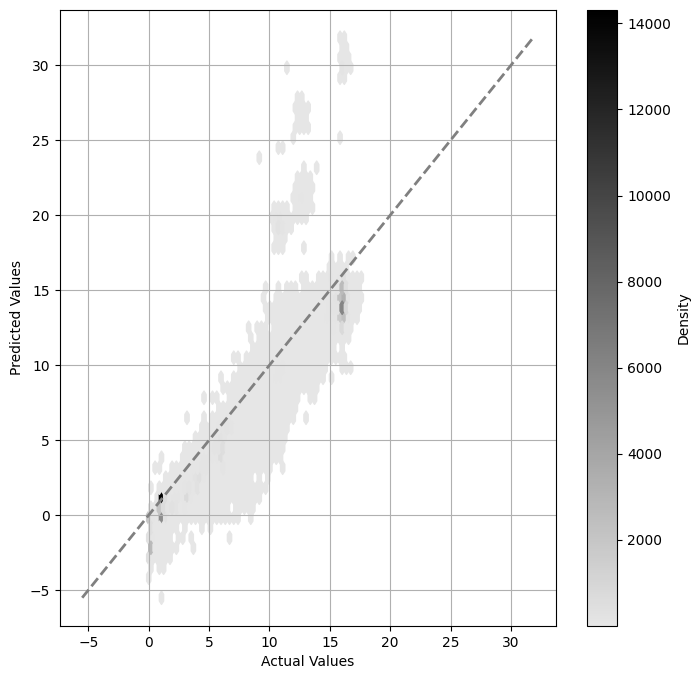

Epoch 1/30
4253/4253 [==============================] - 19s 4ms/step - loss: 6.9055e-05
Epoch 2/30
4253/4253 [==============================] - 18s 4ms/step - loss: 2.3594e-05
Epoch 3/30
4253/4253 [==============================] - 18s 4ms/step - loss: 1.9682e-05
Epoch 4/30
2030/4253 [=============>................] - ETA: 9s - loss: 1.7506e-05

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming `X` and `y` are your data where X is a 2D numpy array with multiple features and y is a 1D array

# Normalize your data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X = scaler_x.fit_transform(X)
y = scaler_y.fit_transform(y.values.reshape(-1, 1))
 # Reshaping y to a 2D array

# Function to convert data into X (features) and Y (labels) for the LSTM
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps), :]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Create a dataset using the function above
time_steps = 2 
X, y = create_dataset(X, y, time_steps)

# Define the LSTM model
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Time series cross-validator
tscv = TimeSeriesSplit(n_splits=5)
mse_scores = []

# Plotting function
def plot_actual_vs_predicted(actual, predicted, title):
    plt.figure(figsize=(8, 8))
    
    colors = [(0.9, 0.9, 0.9), (0.6, 0.6, 0.6), (0.3, 0.3, 0.3), (0.0, 0.0, 0.0)]
    cmap_name = "custom_light_to_dark_gray"
    cm = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

    hb = plt.hexbin(actual, predicted, gridsize=50, cmap=cm, mincnt=1)
    cb = plt.colorbar(hb)
    cb.set_label('Density')
    
    max_val = max(actual.max(), predicted.max())
    min_val = min(actual.min(), predicted.min())
    plt.plot([min_val, max_val], [min_val, max_val], '--', color='gray', linewidth=2)
    
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

# Train and evaluate the model
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = create_model((X_train.shape[1], X_train.shape[2]))
    model.fit(X_train, y_train, epochs=30, verbose=1)

    y_pred = model.predict(X_test)

    y_test = scaler_y.inverse_transform(y_test)
    y_pred = scaler_y.inverse_transform(y_pred)

    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    plot_actual_vs_predicted(y_test, y_pred, f'Actual vs Predicted for fold {len(mse_scores)}')

print("Mean MSE over all splits: ", np.mean(mse_scores))


In [ ]:
from sklearn.metrics import mean_squared_error
import math

# 1. Calculate RMSE
rmse = math.sqrt(np.mean(mse_scores))
print('Root Mean Squared Error: %.3f' % rmse)



Root Mean Squared Error: 3.795
Naive RMSE: 17.242
Predicted: 16.150, Actual: 16.100
Predicted: 16.244, Actual: 16.060
Predicted: 16.383, Actual: 16.030
Predicted: 16.177, Actual: 16.070
Predicted: 16.107, Actual: 16.040


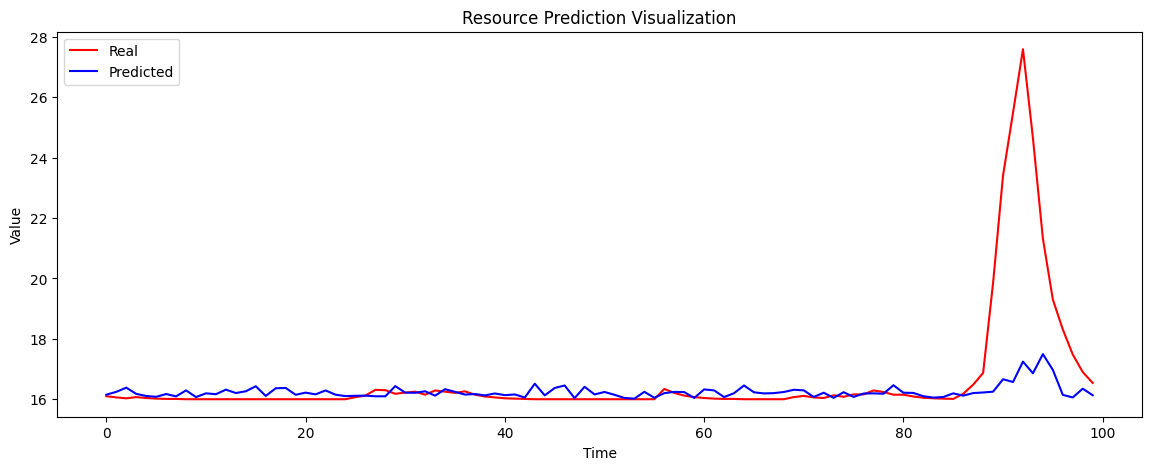

In [ ]:
import matplotlib.pyplot as plt

# Visualizing the results
plt.figure(figsize=(14,5))
plt.plot(y_test[:100], color = 'red', label = 'Real')
plt.plot(y_pred[:100], color = 'blue', label = 'Predicted')
plt.title('Resource     23456Prediction Visualization')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
# ### Linear 
# # Compute baseline_predictions
# idlePower = y_min
# baseline_predictions = idlePower + factor * x * 100

# # Now calculate the RMSE
# baseline_mse = mean_squared_error(y, baseline_predictions)
# baseline_rmse = math.sqrt(baseline_mse)
# print('Baseline RMSE: %.3f' % baseline_rmse)


# # Plot actual vs. LSTM vs. baseline
# plt.figure(figsize=(14,5))
# plt.plot(y[100:2000], color = 'red', label = 'Real')
# plt.plot(baseline_predictions[100:2000], color = 'green', label = 'Baseline Predicted')
# plt.title('Prediction Visualization')
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.legend()
# plt.show()


NameError: name 'y_min' is not defined